In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from autots import AutoTS
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import autots

In [2]:
SEED = 66

In [3]:
end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days=360)).strftime('%Y-%m-%d')

In [4]:
df = yf.download('AAPL', start=start_date, end=end_date, progress=False)

In [5]:
df['Date'] = df.index
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       248 non-null    float64       
 1   High       248 non-null    float64       
 2   Low        248 non-null    float64       
 3   Close      248 non-null    float64       
 4   Adj Close  248 non-null    float64       
 5   Volume     248 non-null    int64         
 6   Date       248 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


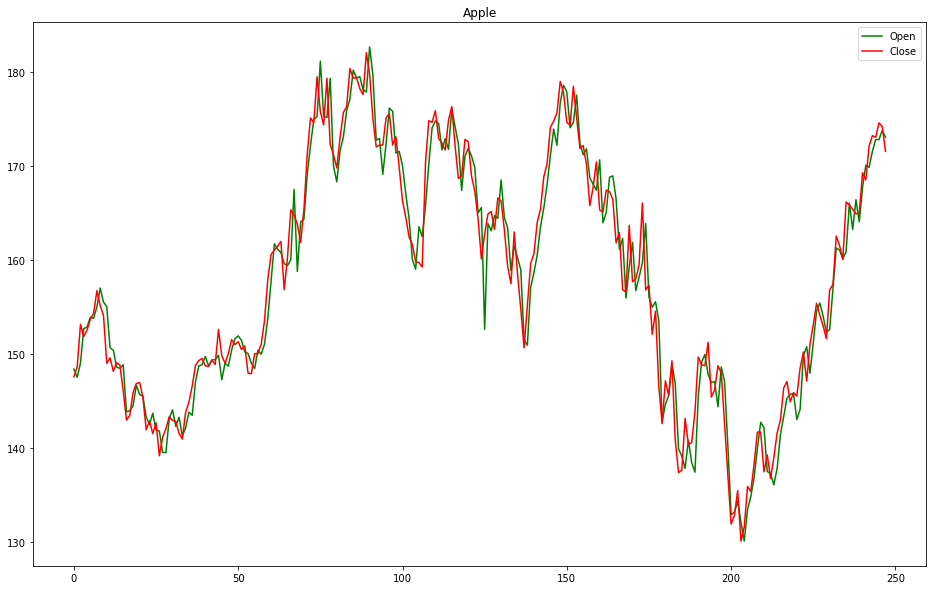

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(df.index, df['Open'], label='Open', color='green')
plt.plot(df.index, df['Close'], label='Close', color='red')
plt.title('Apple')
plt.legend()
plt.show()

In [7]:
train_df = df[:-5]

In [8]:
test_df = df[-5:]

In [9]:
model = AutoTS(forecast_length=5, frequency='infer', ensemble='simple')
model.fit(train_df, date_col='Date', value_col='Open', id_col=None)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50


2022-08-22 12:55:49.805675: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 2s 2ms/step - loss: 0.3978
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3794
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3748
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3611
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3407
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3308
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3249
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: 0.3215
Epoch 

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 35 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 35: FBProphet
Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10
Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model ETS in generation 0 of 10
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/scipy/signal/signaltools.py)") in model 46: ARDL
Model Number: 47 with model MultivariateMotif in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 with model UnivariateMotif in generation 0 of 10
Model Number: 50 with model UnivariateMotif in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Model Number: 53 with model MultivariateRegression in generation

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71: VECM
Model Number: 72 with model WindowRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 72: WindowRegression
Model Number: 73 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 73: DatepartRegression
Model Number: 74 with model UnivariateRegression in generation 0 of 10
Model Number: 75 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 75: MultivariateRegression
Model Number: 76 with model UnivariateMotif in generation 0 of 1

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 84 with model GLM in generation 0 of 10
Template Eval Error: NameError("name 'SM_GLM' is not defined") in model 84: GLM
Model Number: 85 with model NVAR in generation 0 of 10
Model Number: 86 with model LastValueNaive in generation 0 of 10
Model Number: 87 with model LastValueNaive in generation 0 of 10
Model Number: 88 with model LastValueNaive in generation 0 of 10
Model Number: 89 with model LastValueNaive in generation 0 of 10
Model Number: 90 with model UnivariateMotif in generation 0 of 10
Model Number: 91 with model GLM in generation 0 of 10
Template Eval Error: NameError("name 'SM_GLM' is not defined") in model 91: GLM
Model Number: 92 with model ConstantNaive in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on inverse') in model 92: ConstantNaive
Model Number: 93 with model GLM in generation 0 of 10
Template Eval Error: NameError("name 'SM_GLM' is not defined") in model 93: GLM
Model Number: 94 with model MultivariateMotif in gener

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 1/50
4/4 [==============================] - 2s 5ms/step - loss: 106.5559
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 105.7244
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 100.7730
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 104.8827
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 99.8375
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 103.0766
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 103.3641
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 100.4692
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 100.6775
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 100.7487
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 102.4411
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 101.7402
Epoch 13/50
4/4 [==============================] -

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py

Model Number: 149 with model AverageValueNaive in generation 0 of 10
Model Number: 150 with model ConstantNaive in generation 0 of 10
Model Number: 151 with model SectionalMotif in generation 0 of 10
Model Number: 152 with model ConstantNaive in generation 0 of 10
Model Number: 153 with model LastValueNaive in generation 0 of 10
Model Number: 154 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 154: FBProphet
Model Number: 155 with model GluonTS in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 155: GluonTS
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: ImportError("cannot import name '_centered' from 'scipy.signal.signaltools' (/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/scipy/signal/signaltools.py)") in model 156: VAR
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 178: SectionalMotif
Model Number: 179 with model ETS in generation 1 of 10
Model Number: 180 with model WindowRegression in generation 1 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 169.1158
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 160.7654
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 147.5552
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 131.8947
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 115.2275
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 100.3308
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 87.0760
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 75.9873
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 65.0975
Epoch 10/100
14/14 [================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarn

Model Number: 204 with model UnivariateRegression in generation 1 of 10
Model Number: 205 with model ConstantNaive in generation 1 of 10
Model Number: 206 with model ETS in generation 1 of 10
Model Number: 207 with model UnivariateMotif in generation 1 of 10
Model Number: 208 with model GLS in generation 1 of 10
Model Number: 209 with model GLS in generation 1 of 10
Model Number: 210 with model LastValueNaive in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10
Model Number: 212 with model AverageValueNaive in generation 1 of 10
Model Number: 213 with model NVAR in generation 1 of 10
Model Number: 214 with model LastValueNaive in generation 1 of 10
Model Number: 215 with model UnobservedComponents in generation 1 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invali

Model Number: 216 with model SectionalMotif in generation 1 of 10
Model Number: 217 with model SeasonalNaive in generation 1 of 10
Model Number: 218 with model DatepartRegression in generation 1 of 10
Model Number: 219 with model SectionalMotif in generation 1 of 10
Model Number: 220 with model AverageValueNaive in generation 1 of 10
Model Number: 221 with model ConstantNaive in generation 1 of 10
Model Number: 222 with model AverageValueNaive in generation 1 of 10
Model Number: 223 with model UnivariateMotif in generation 1 of 10
Model Number: 224 with model SectionalMotif in generation 1 of 10
Model Number: 225 with model ConstantNaive in generation 1 of 10
Model Number: 226 with model GLS in generation 1 of 10
Model Number: 227 with model NVAR in generation 1 of 10
Model Number: 228 with model MultivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 228: MultivariateMotif
Model Number: 229 with model UnivariateMotif in ge

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.un

Model Number: 230 with model UnobservedComponents in generation 1 of 10
Model Number: 231 with model SeasonalNaive in generation 1 of 10
Model Number: 232 with model AverageValueNaive in generation 1 of 10
Model Number: 233 with model SectionalMotif in generation 1 of 10
Model Number: 234 with model MultivariateRegression in generation 1 of 10
Model Number: 235 with model LastValueNaive in generation 1 of 10
Model Number: 236 with model MultivariateRegression in generation 1 of 10
Model Number: 237 with model NVAR in generation 1 of 10
Model Number: 238 with model MultivariateRegression in generation 1 of 10
Model Number: 239 with model UnivariateMotif in generation 1 of 10
Model Number: 240 with model NVAR in generation 1 of 10
Model Number: 241 with model ETS in generation 1 of 10
Model Number: 242 with model LastValueNaive in generation 1 of 10
Model Number: 243 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_re

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0

Model Number: 276 with model AverageValueNaive in generation 1 of 10
Model Number: 277 with model ConstantNaive in generation 1 of 10
Model Number: 278 with model UnobservedComponents in generation 1 of 10
Model Number: 279 with model UnobservedComponents in generation 1 of 10
New Generation: 2 of 10
Model Number: 280 with model ETS in generation 2 of 10
Model Number: 281 with model ConstantNaive in generation 2 of 10
Model Number: 282 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 282: AverageValueNaive
Model Number: 283 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 283: SectionalMotif
Model Number: 284 with model WindowRegression in generation 2 of 10
Model Number: 285 with model DatepartRegression in generation 2 of 10
Model Number: 286 with model SectionalMotif in generation 2 of 10
Model Number

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the 

Model Number: 289 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 289: UnivariateMotif
Model Number: 290 with model MultivariateMotif in generation 2 of 10
Model Number: 291 with model MultivariateMotif in generation 2 of 10
Model Number: 292 with model UnobservedComponents in generation 2 of 10
Model Number: 293 with model UnivariateMotif in generation 2 of 10
Model Number: 294 with model SeasonalNaive in generation 2 of 10
Model Number: 295 with model SectionalMotif in generation 2 of 10
Model Number: 296 with model MultivariateRegression in generation 2 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 297 with model NVAR in generation 2 of 10
Model Number: 298 with model LastValueNaive in generation 2 of 10
Model Number: 299 with model SectionalMotif in generation 2 of 10
Model Number: 300 with model UnivariateMotif in generation 2 of 10
Model Number: 301 with model SeasonalNaive in generation 2 of 10
Model Number: 302 with model LastValueNaive in generation 2 of 10
Model Number: 303 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 303: SectionalMotif
Model Number: 304 with model NVAR in generation 2 of 10
Model Number: 305 with model SeasonalNaive in generation 2 of 10
Model Number: 306 with model ETS in generation 2 of 10
Model Number: 307 with model MultivariateMotif in generation 2 of 10
Model Number: 308 with model NVAR in generation 2 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn

Model Number: 309 with model MultivariateRegression in generation 2 of 10
Model Number: 310 with model LastValueNaive in generation 2 of 10
Model Number: 311 with model SectionalMotif in generation 2 of 10
Model Number: 312 with model ConstantNaive in generation 2 of 10
Model Number: 313 with model DatepartRegression in generation 2 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 314 with model UnivariateMotif in generation 2 of 10
Model Number: 315 with model LastValueNaive in generation 2 of 10
Model Number: 316 with model ETS in generation 2 of 10
Model Number: 317 with model ETS in generation 2 of 10
Model Number: 318 with model AverageValueNaive in generation 2 of 10
Model Number: 319 with model ETS in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/minifo

Model Number: 320 with model UnivariateMotif in generation 2 of 10
Model Number: 321 with model AverageValueNaive in generation 2 of 10
Model Number: 322 with model ETS in generation 2 of 10
Model Number: 323 with model LastValueNaive in generation 2 of 10
Model Number: 324 with model WindowRegression in generation 2 of 10
Epoch 1/50
4/4 [==============================] - 2s 3ms/step - loss: 268.5343
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 242.3998
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 167.8066
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 219.9149
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 161.2336
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 133.4686
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 147.9897
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 140.4666
Epoch 9/50
4/4 [===========================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 345 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 345: UnivariateMotif
Model Number: 346 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 346: DatepartRegression
Model Number: 347 with model ConstantNaive in generation 2 of 10
Model Number: 348 with model UnivariateMotif in generation 2 of 10
Model Number: 349 with model SectionalMotif in generation 2 of 10
Model Number: 350 with model UnobservedComponents in generation 2 of 10
Model Number: 351 with model SectionalMotif in generation 2 of 10
Model Number: 352 with model MultivariateMotif in generation 2 of 10
Model Number: 353 with model ConstantNaive in generation 2 of 10
Model Number: 354 with model WindowRegression in generation 2 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 10.7640
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 10.6351
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 10.5589
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 10.3810
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 10.3158
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 9.9555
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 9.5668
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 9.0007
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 8.3314
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 7.4995
Epoch 11/100
14/14 [==============================] - 0s 1ms/step - loss: 6.6764
Epoch 12/100
14/14 [==============================] - 0s 1ms/step - loss: 5.7794
Epoch 13/100
14/14 [============

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapse

Epoch 1/50
8/8 [==============================] - 2s 3ms/step - loss: nan 
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: nan
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 14/50
8/8 [================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)


Model Number: 365 with model WindowRegression in generation 2 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.8412
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4633
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1282
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1186
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.1070
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0843
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0866
Epoch 11/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0841
Epoch 12/100
14/14 [==============================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 379 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 379: DatepartRegression
Model Number: 380 with model WindowRegression in generation 2 of 10
Model Number: 381 with model ETS in generation 2 of 10
Model Number: 382 with model ETS in generation 2 of 10
Model Number: 383 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 383: WindowRegression
Model Number: 384 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 384: MultivariateRegression
Model Number: 385 with model GLS in generation 2 of 10
Model Number: 386 with model AverageValueNaive in generation 2 of 10
Model Number: 387 with model UnivariateMotif in generation 2 of 10
Model Number: 388 with model GLS in generation 2 of 10
Model Number: 389 with model ConstantNaive in generation 2 o

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/l

Model Number: 392 with model MultivariateMotif in generation 3 of 10
Model Number: 393 with model SectionalMotif in generation 3 of 10
Model Number: 394 with model GLS in generation 3 of 10
Model Number: 395 with model ETS in generation 3 of 10
Model Number: 396 with model ETS in generation 3 of 10
Model Number: 397 with model ETS in generation 3 of 10
Model Number: 398 with model UnivariateMotif in generation 3 of 10
Model Number: 399 with model ConstantNaive in generation 3 of 10
Model Number: 400 with model AverageValueNaive in generation 3 of 10
Model Number: 401 with model LastValueNaive in generation 3 of 10
Model Number: 402 with model DatepartRegression in generation 3 of 10
Model Number: 403 with model ETS in generation 3 of 10
Model Number: 404 with model ETS in generation 3 of 10
Model Number: 405 with model ETS in generation 3 of 10
Model Number: 406 with model UnobservedComponents in generation 3 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarn

Model Number: 407 with model WindowRegression in generation 3 of 10
Model Number: 408 with model UnivariateMotif in generation 3 of 10
Model Number: 409 with model ETS in generation 3 of 10
Model Number: 410 with model UnivariateMotif in generation 3 of 10
Model Number: 411 with model SectionalMotif in generation 3 of 10
Model Number: 412 with model MultivariateRegression in generation 3 of 10
Model Number: 413 with model GLS in generation 3 of 10
Model Number: 414 with model UnivariateRegression in generation 3 of 10
Model Number: 415 with model MultivariateMotif in generation 3 of 10
Model Number: 416 with model SeasonalNaive in generation 3 of 10
Model Number: 417 with model UnivariateMotif in generation 3 of 10
Model Number: 418 with model MultivariateRegression in generation 3 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7

Model Number: 419 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 419: WindowRegression
Model Number: 420 with model SeasonalNaive in generation 3 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 421 with model UnivariateMotif in generation 3 of 10
Model Number: 422 with model AverageValueNaive in generation 3 of 10
Model Number: 423 with model GLS in generation 3 of 10
Model Number: 424 with model SectionalMotif in generation 3 of 10
Model Number: 425 with model AverageValueNaive in generation 3 of 10
Model Number: 426 with model UnivariateMotif in generation 3 of 10
Model Number: 427 with model UnivariateMotif in generation 3 of 10
Model Number: 428 with model AverageValueNaive in generation 3 of 10
Model Number: 429 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 429: ConstantNaive
Model Number: 430 with model NVAR in generation 3 of 10
Model Number: 431 with model WindowRegression in generation 3 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the 

Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.3147
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 11/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 12/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 13/100
14/14 [=================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

Model Number: 445 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 445: MultivariateMotif
Model Number: 446 with model ConstantNaive in generation 3 of 10
Model Number: 447 with model ETS in generation 3 of 10
Model Number: 448 with model ETS in generation 3 of 10
Model Number: 449 with model MultivariateMotif in generation 3 of 10
Model Number: 450 with model LastValueNaive in generation 3 of 10
Model Number: 451 with model NVAR in generation 3 of 10
Model Number: 452 with model DatepartRegression in generation 3 of 10
Model Number: 453 with model SectionalMotif in generation 3 of 10
Model Number: 454 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 454: DatepartRegression
Model Number: 455 with model ConstantNaive in generation 3 of 10
Model Number: 456 with model SectionalMoti

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 460 with model LastValueNaive in generation 3 of 10
Model Number: 461 with model NVAR in generation 3 of 10
Model Number: 462 with model MultivariateMotif in generation 3 of 10
Model Number: 463 with model NVAR in generation 3 of 10
Model Number: 464 with model SectionalMotif in generation 3 of 10
Model Number: 465 with model LastValueNaive in generation 3 of 10
Model Number: 466 with model UnivariateMotif in generation 3 of 10
Model Number: 467 with model ETS in generation 3 of 10
Model Number: 468 with model SectionalMotif in generation 3 of 10
Model Number: 469 with model MultivariateRegression in generation 3 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent work

Model Number: 470 with model SectionalMotif in generation 3 of 10
Model Number: 471 with model SectionalMotif in generation 3 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 472 with model ConstantNaive in generation 3 of 10
Model Number: 473 with model AverageValueNaive in generation 3 of 10
Model Number: 474 with model AverageValueNaive in generation 3 of 10
Model Number: 475 with model ConstantNaive in generation 3 of 10
Model Number: 476 with model WindowRegression in generation 3 of 10
Epoch 1/50
4/4 [==============================] - 2s 3ms/step - loss: 100.1863
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 99.7287
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 99.5913
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 99.4365
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 99.0793
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 98.8381
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 98.8961
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 98.6494
Epoch 9/50
4/4 [=======================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: Runt

Model Number: 486 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 486: MultivariateMotif
Model Number: 487 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 487: DatepartRegression
Model Number: 488 with model UnobservedComponents in generation 3 of 10
Model Number: 489 with model SectionalMotif in generation 3 of 10
Model Number: 490 with model ConstantNaive in generation 3 of 10
Model Number: 491 with model WindowRegression in generation 3 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.0146
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/100
14/14 [==============================] 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

New Generation: 4 of 10
Model Number: 500 with model ETS in generation 4 of 10
Model Number: 501 with model ConstantNaive in generation 4 of 10
Model Number: 502 with model UnivariateMotif in generation 4 of 10
Model Number: 503 with model UnivariateMotif in generation 4 of 10
Model Number: 504 with model WindowRegression in generation 4 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 505 with model UnivariateMotif in generation 4 of 10
Model Number: 506 with model LastValueNaive in generation 4 of 10
Model Number: 507 with model ETS in generation 4 of 10
Model Number: 508 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 508: DatepartRegression
Model Number: 509 with model SeasonalNaive in generation 4 of 10
Model Number: 510 with model SectionalMotif in generation 4 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 511 with model ETS in generation 4 of 10
Model Number: 512 with model SectionalMotif in generation 4 of 10
Model Number: 513 with model MultivariateMotif in generation 4 of 10
Model Number: 514 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 514: SectionalMotif
Model Number: 515 with model NVAR in generation 4 of 10
Model Number: 516 with model ConstantNaive in generation 4 of 10
Model Number: 517 with model SectionalMotif in generation 4 of 10
Model Number: 518 with model MultivariateMotif in generation 4 of 10
Model Number: 519 with model UnivariateMotif in generation 4 of 10
Model Number: 520 with model ConstantNaive in generation 4 of 10
Model Number: 521 with model ETS in generation 4 of 10
Model Number: 522 with model DatepartRegression in generation 4 of 10
Model Number: 523 with model UnobservedComponents in generation 4 of 10
Model Number: 524 with model NVAR in g

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

Model Number: 538 with model GLS in generation 4 of 10
Model Number: 539 with model ETS in generation 4 of 10
Model Number: 540 with model MultivariateRegression in generation 4 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)


Model Number: 541 with model DatepartRegression in generation 4 of 10
Epoch 1/50
7/7 [==============================] - 3s 59ms/step - loss: 55978207614279167848298414828683264.0000 - val_loss: 33110333003899116441858294820110336.0000
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 54453283363326493576551076030578688.0000 - val_loss: 33110333003899116441858294820110336.0000
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 50004924095520136653460658605522944.0000 - val_loss: 33110333003899116441858294820110336.0000
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 51864007977157192193572067803660288.0000 - val_loss: 33110333003899116441858294820110336.0000
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 54149329469600675586894544261611520.0000 - val_loss: 33110333003899116441858294820110336.0000
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 52110055987605397235489918137925632.000

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapse

Model Number: 550 with model SectionalMotif in generation 4 of 10
Model Number: 551 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (47)') in model 551: SectionalMotif
Model Number: 552 with model NVAR in generation 4 of 10
Model Number: 553 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 553: LastValueNaive
Model Number: 554 with model UnivariateMotif in generation 4 of 10
Model Number: 555 with model LastValueNaive in generation 4 of 10
Model Number: 556 with model UnivariateRegression in generation 4 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: Runt

Model Number: 557 with model LastValueNaive in generation 4 of 10
Model Number: 558 with model MultivariateMotif in generation 4 of 10
Model Number: 559 with model UnobservedComponents in generation 4 of 10
Model Number: 560 with model LastValueNaive in generation 4 of 10
Model Number: 561 with model SectionalMotif in generation 4 of 10
Model Number: 562 with model UnivariateMotif in generation 4 of 10
Model Number: 563 with model WindowRegression in generation 4 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.6279
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5231
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4423
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3118
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2722
Epoch 7/100
14/14 [===========================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: F

Model Number: 570 with model AverageValueNaive in generation 4 of 10
Model Number: 571 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 571: UnivariateMotif
Model Number: 572 with model UnivariateRegression in generation 4 of 10
Model Number: 573 with model ETS in generation 4 of 10
Model Number: 574 with model SectionalMotif in generation 4 of 10
Model Number: 575 with model ETS in generation 4 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: Runt

Model Number: 576 with model AverageValueNaive in generation 4 of 10
Model Number: 577 with model AverageValueNaive in generation 4 of 10
Model Number: 578 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 578: DatepartRegression
Model Number: 579 with model AverageValueNaive in generation 4 of 10
Model Number: 580 with model ConstantNaive in generation 4 of 10
Model Number: 581 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 581: MultivariateMotif
Model Number: 582 with model SectionalMotif in generation 4 of 10
Model Number: 583 with model UnobservedComponents in generation 4 of 10
Model Number: 584 with model UnobservedComponents in generation 4 of 10
Model Number: 585 with model NVAR in generation 4 of 10
Model Number: 586 with model LastValueNaive in generation 4 of 10
Model Number: 587 with model MultivariateMotif in

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 588 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 588: UnobservedComponents
Model Number: 589 with model WindowRegression in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 589: WindowRegression
Model Number: 590 with model MultivariateMotif in generation 4 of 10
Model Number: 591 with model UnobservedComponents in generation 4 of 10
Model Number: 592 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 592: ETS
Model Number: 593 with model UnivariateMotif in generation 4 of 10
Model Number: 594 with model ETS in generation 4 of 10
Model Number: 595 with model NVAR in generation 4 of 10
Model Number: 596 with model AverageValueNaive in generation 4 of 10
Model Number: 597 with model NVAR in generation 4 of 10
Model Number: 598 with model UnivariateRegression 

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel

Model Number: 607 with model LastValueNaive in generation 4 of 10
Model Number: 608 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend 

Model Number: 609 with model AverageValueNaive in generation 4 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


New Generation: 5 of 10
Model Number: 610 with model NVAR in generation 5 of 10
Model Number: 611 with model AverageValueNaive in generation 5 of 10
Model Number: 612 with model MultivariateMotif in generation 5 of 10
Model Number: 613 with model SectionalMotif in generation 5 of 10
Model Number: 614 with model NVAR in generation 5 of 10
Model Number: 615 with model ETS in generation 5 of 10
Model Number: 616 with model LastValueNaive in generation 5 of 10
Model Number: 617 with model WindowRegression in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 617: WindowRegression
Model Number: 618 with model UnivariateMotif in generation 5 of 10
Model Number: 619 with model WindowRegression in generation 5 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)


Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.0044
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 11/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 12/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 13/100
14/14 [=================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 621 with model SeasonalNaive in generation 5 of 10
Model Number: 622 with model ConstantNaive in generation 5 of 10
Model Number: 623 with model UnobservedComponents in generation 5 of 10
Model Number: 624 with model UnivariateRegression in generation 5 of 10
Model Number: 625 with model WindowRegression in generation 5 of 10
Model Number: 626 with model ConstantNaive in generation 5 of 10
Model Number: 627 with model NVAR in generation 5 of 10
Model Number: 628 with model SectionalMotif in generation 5 of 10
Model Number: 629 with model SeasonalNaive in generation 5 of 10
Model Number: 630 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 630: MultivariateRegression
Model Number: 631 with model UnobservedComponents in generation 5 of 10
Model Number: 632 with model UnivariateMotif in generation 5 of 10
Model Number: 633 with model LastValueNaive in generation 5 of 

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurre

Model Number: 653 with model ConstantNaive in generation 5 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 654 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 654: WindowRegression
Model Number: 655 with model NVAR in generation 5 of 10
Model Number: 656 with model LastValueNaive in generation 5 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 656: LastValueNaive
Model Number: 657 with model NVAR in generation 5 of 10
Model Number: 658 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 658: UnobservedComponents
Model Number: 659 with model MultivariateMotif in generation 5 of 10
Model Number: 660 with model UnobservedComponents in generation 5 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 661 with model MultivariateMotif in generation 5 of 10
Model Number: 662 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 662: ETS
Model Number: 663 with model LastValueNaive in generation 5 of 10
Model Number: 664 with model SectionalMotif in generation 5 of 10
Model Number: 665 with model ConstantNaive in generation 5 of 10
Model Number: 666 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 666: WindowRegression
Model Number: 667 with model NVAR in generation 5 of 10
Model Number: 668 with model SeasonalNaive in generation 5 of 10
Model Number: 669 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 669: DatepartRegression
Model Number: 670 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit'

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 681 with model SectionalMotif in generation 5 of 10
Model Number: 682 with model UnobservedComponents in generation 5 of 10
Model Number: 683 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 683: WindowRegression
Model Number: 684 with model AverageValueNaive in generation 5 of 10
Model Number: 685 with model AverageValueNaive in generation 5 of 10
Model Number: 686 with model LastValueNaive in generation 5 of 10
Model Number: 687 with model UnobservedComponents in generation 5 of 10
Model Number: 688 with model LastValueNaive in generation 5 of 10
Model Number: 689 with model SectionalMotif in generation 5 of 10
Model Number: 690 with model ETS in generation 5 of 10
Model Number: 691 with model NVAR in generation 5 of 10
Model Number: 692 with model SeasonalNaive in generation 5 of 10
Model Number: 693 with model UnivariateMotif in generation 5 of 10
Model Number: 694 with model UnivariateMot

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invali

New Generation: 6 of 10
Model Number: 698 with model SectionalMotif in generation 6 of 10
Model Number: 699 with model GLS in generation 6 of 10
Model Number: 700 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 700: WindowRegression
Model Number: 701 with model WindowRegression in generation 6 of 10
Model Number: 702 with model MultivariateRegression in generation 6 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent work

Model Number: 703 with model UnobservedComponents in generation 6 of 10
Model Number: 704 with model UnivariateMotif in generation 6 of 10
Model Number: 705 with model AverageValueNaive in generation 6 of 10
Model Number: 706 with model UnivariateMotif in generation 6 of 10
Model Number: 707 with model NVAR in generation 6 of 10
Model Number: 708 with model UnobservedComponents in generation 6 of 10
Model Number: 709 with model ETS in generation 6 of 10
Model Number: 710 with model SeasonalNaive in generation 6 of 10
Model Number: 711 with model LastValueNaive in generation 6 of 10
Model Number: 712 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 712: UnobservedComponents
Model Number: 713 with model MultivariateMotif in generation 6 of 10
Model Number: 714 with model SeasonalNaive in generation 6 of 10
Model Number: 715 with model UnivariateMotif in generation 6 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 715: UnivariateMotif
Model Number: 716 with model UnobservedComponents in generation 6 of 10
Model Number: 717 with model LastValueNaive in generation 6 of 10
Model Number: 718 with model SeasonalNaive in generation 6 of 10
Model Number: 719 with model MultivariateMotif in generation 6 of 10
Model Number: 720 with model SectionalMotif in generation 6 of 10
Model Number: 721 with model ETS in generation 6 of 10
Model Number: 722 with model LastValueNaive in generation 6 of 10
Model Number: 723 with model SectionalMotif in generation 6 of 10
Model Number: 724 with model GLS in generation 6 of 10
Model Number: 725 with model AverageValueNaive in generation 6 of 10
Model Number: 726 with model NVAR in generation 6 of 10
Model Number: 727 with model NVAR in generation 6 of 10
Model Number: 728 with model ETS in generation 6 of 10
Model Number: 729 with model LastV

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)


Model Number: 743 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 743: LastValueNaive
Model Number: 744 with model WindowRegression in generation 6 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 745 with model GLS in generation 6 of 10
Model Number: 746 with model MultivariateMotif in generation 6 of 10
Model Number: 747 with model SectionalMotif in generation 6 of 10
Model Number: 748 with model UnivariateRegression in generation 6 of 10
Model Number: 749 with model UnivariateMotif in generation 6 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 750 with model UnivariateMotif in generation 6 of 10
Model Number: 751 with model NVAR in generation 6 of 10
Model Number: 752 with model LastValueNaive in generation 6 of 10
Model Number: 753 with model MultivariateMotif in generation 6 of 10
Model Number: 754 with model DatepartRegression in generation 6 of 10
Model Number: 755 with model WindowRegression in generation 6 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 0.1724
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 8/100
14/14 [=========================

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 764 with model ETS in generation 6 of 10
Model Number: 765 with model SeasonalNaive in generation 6 of 10
Model Number: 766 with model AverageValueNaive in generation 6 of 10
Model Number: 767 with model UnivariateMotif in generation 6 of 10
Model Number: 768 with model UnivariateMotif in generation 6 of 10
Model Number: 769 with model GLS in generation 6 of 10
Model Number: 770 with model DatepartRegression in generation 6 of 10
Model Number: 771 with model NVAR in generation 6 of 10
Model Number: 772 with model MultivariateMotif in generation 6 of 10
Model Number: 773 with model SeasonalNaive in generation 6 of 10
Model Number: 774 with model ETS in generation 6 of 10
Model Number: 775 with model UnivariateMotif in generation 6 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 776 with model NVAR in generation 6 of 10
Model Number: 777 with model MultivariateMotif in generation 6 of 10
Model Number: 778 with model ETS in generation 6 of 10
Model Number: 779 with model UnobservedComponents in generation 6 of 10
Model Number: 780 with model UnivariateMotif in generation 6 of 10
Model Number: 781 with model UnivariateMotif in generation 6 of 10
Model Number: 782 with model AverageValueNaive in generation 6 of 10
Model Number: 783 with model ConstantNaive in generation 6 of 10
Model Number: 784 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 784: UnobservedComponents
Model Number: 785 with model LastValueNaive in generation 6 of 10
New Generation: 7 of 10
Model Number: 786 with model WindowRegression in generation 7 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Epoch 1/50


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


12/12 [==============================] - 2s 28ms/step - loss: 0.0603 - val_loss: 0.0463
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.0488 - val_loss: 0.0435
Epoch 3/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0433 - val_loss: 0.0412
Epoch 4/50
12/12 [==============================] - 0s 18ms/step - loss: 0.0418 - val_loss: 0.0401
Epoch 5/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0402 - val_loss: 0.0392
Epoch 6/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0369 - val_loss: 0.0387
Epoch 7/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0357 - val_loss: 0.0382
Epoch 8/50
12/12 [==============================] - 0s 20ms/step - loss: 0.0340 - val_loss: 0.0394
Epoch 9/50
12/12 [==============================] - 0s 20ms/step - loss: 0.0334 - val_loss: 0.0383
Epoch 10/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0314 - val_loss: 0.0367
Epoch 11/50
12/12 [=

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 796 with model ETS in generation 7 of 10
Model Number: 797 with model ETS in generation 7 of 10
Model Number: 798 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 799 with model MultivariateMotif in generation 7 of 10
Model Number: 800 with model LastValueNaive in generation 7 of 10
Model Number: 801 with model UnivariateMotif in generation 7 of 10
Model Number: 802 with model GLS in generation 7 of 10
Model Number: 803 with model UnivariateMotif in generation 7 of 10
Model Number: 804 with model SeasonalNaive in generation 7 of 10
Model Number: 805 with model UnobservedComponents in generation 7 of 10
Model Number: 806 with model SectionalMotif in generation 7 of 10
Model Number: 807 with model SeasonalNaive in generation 7 of 10
Model N

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 818 with model NVAR in generation 7 of 10
Model Number: 819 with model GLS in generation 7 of 10
Model Number: 820 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 820: WindowRegression
Model Number: 821 with model SectionalMotif in generation 7 of 10
Model Number: 822 with model LastValueNaive in generation 7 of 10
Model Number: 823 with model SeasonalNaive in generation 7 of 10
Model Number: 824 with model WindowRegression in generation 7 of 10
Model Number: 825 with model SectionalMotif in generation 7 of 10
Model Number: 826 with model UnivariateMotif in generation 7 of 10
Model Number: 827 with model UnivariateMotif in generation 7 of 10
Model Number: 828 with model SectionalMotif in generation 7 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/ut

Model Number: 829 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 829: UnivariateMotif
Model Number: 830 with model DatepartRegression in generation 7 of 10
Model Number: 831 with model NVAR in generation 7 of 10
Model Number: 832 with model UnivariateMotif in generation 7 of 10
Model Number: 833 with model ETS in generation 7 of 10
Model Number: 834 with model UnobservedComponents in generation 7 of 10
Model Number: 835 with model UnobservedComponents in generation 7 of 10
Model Number: 836 with model WindowRegression in generation 7 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

Model Number: 837 with model AverageValueNaive in generation 7 of 10
Model Number: 838 with model AverageValueNaive in generation 7 of 10
Model Number: 839 with model SectionalMotif in generation 7 of 10
Model Number: 840 with model MultivariateMotif in generation 7 of 10
Model Number: 841 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 841: WindowRegression
Model Number: 842 with model SeasonalNaive in generation 7 of 10
Model Number: 843 with model UnobservedComponents in generation 7 of 10
Model Number: 844 with model UnobservedComponents in generation 7 of 10
Model Number: 845 with model UnobservedComponents in generation 7 of 10
Model Number: 846 with model NVAR in generation 7 of 10
Model Number: 847 with model LastValueNaive in generation 7 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 848 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer HPFilter failed on fit') in model 848: SeasonalNaive
Model Number: 849 with model WindowRegression in generation 7 of 10
Epoch 1/100
14/14 [==============================] - 2s 2ms/step - loss: 19.6405
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 13.9226
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 8.3369
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 4.4443
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0866
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.2079
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.8871
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6262
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4396
Epoch 10/100
14/14 [============================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurre

Model Number: 858 with model ETS in generation 7 of 10
Model Number: 859 with model ETS in generation 7 of 10
Model Number: 860 with model UnivariateMotif in generation 7 of 10
Model Number: 861 with model SeasonalNaive in generation 7 of 10
Model Number: 862 with model GLS in generation 7 of 10
Model Number: 863 with model UnobservedComponents in generation 7 of 10
Model Number: 864 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 864: SectionalMotif
Model Number: 865 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 866 with model ConstantNaive in generation 7 of 10
Model Number: 867 with model ETS in generation 7 of 10
Model Number: 868 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 868: SeasonalNaive
Model Number: 869 with model SectionalMotif in generation 7 of 10
Model Number: 870 with model LastValueNaive in generation 7 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.

Model Number: 871 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0

Model Number: 872 with model UnobservedComponents in generation 7 of 10
Model Number: 873 with model UnivariateRegression in generation 7 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


New Generation: 8 of 10
Model Number: 874 with model MultivariateMotif in generation 8 of 10
Model Number: 875 with model UnivariateRegression in generation 8 of 10
Model Number: 876 with model MultivariateMotif in generation 8 of 10
Model Number: 877 with model MultivariateMotif in generation 8 of 10
Model Number: 878 with model WindowRegression in generation 8 of 10
Epoch 1/50
12/12 [==============================] - 2s 28ms/step - loss: 0.0050 - val_loss: 1.8455e-04
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 9.2650e-04
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 1.0742e-04
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 5.5716e-05
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 9.9264e-04 - val_loss: 1.1932e-04
Epoch 6/50
12/12 [==============================] - 0s 17ms/step - loss: 8.5097e-04 - val_loss: 5.6259e-05
Epo

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 885 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 885: LastValueNaive
Model Number: 886 with model NVAR in generation 8 of 10
Model Number: 887 with model AverageValueNaive in generation 8 of 10
Model Number: 888 with model DatepartRegression in generation 8 of 10
Model Number: 889 with model LastValueNaive in generation 8 of 10
Model Number: 890 with model ETS in generation 8 of 10
Model Number: 891 with model GLS in generation 8 of 10
Model Number: 892 with model UnivariateMotif in generation 8 of 10
Model Number: 893 with model GLS in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 893: GLS
Model Number: 894 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 894: WindowRegression
Model Number: 895 with model LastValueNaive in generation 8 of

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

Model Number: 926 with model WindowRegression in generation 8 of 10
Epoch 1/100
4/4 [==============================] - 2s 1ms/step - loss: 9.9387
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 6.9912
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 5.5817
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 4.5917
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 3.9679
Epoch 6/100
4/4 [==============================] - 0s 993us/step - loss: 3.5913
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 3.3126
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 3.0853
Epoch 9/100
4/4 [==============================] - 0s 916us/step - loss: 2.9348
Epoch 10/100
4/4 [==============================] - 0s 941us/step - loss: 2.8348
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 2.7424
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - 

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/sit

Epoch 1/50
250/250 [==============================] - 5s 17ms/step - loss: nan - val_loss: nan
Epoch 2/50
250/250 [==============================] - 4s 18ms/step - loss: nan - val_loss: nan
Epoch 3/50
250/250 [==============================] - 4s 18ms/step - loss: nan - val_loss: nan
Epoch 4/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 5/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 6/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 7/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 8/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 9/50
250/250 [==============================] - 4s 17ms/step - loss: nan - val_loss: nan
Epoch 10/50
8/8 [==============================] - 0s 11ms/step
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or m

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Paralle

Model Number: 967 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 968 with model MultivariateMotif in generation 9 of 10
Model Number: 969 with model SeasonalNaive in generation 9 of 10
Model Number: 970 with model LastValueNaive in generation 9 of 10
Model Number: 971 with model UnivariateMotif in generation 9 of 10
Model Number: 972 with model SeasonalNaive in generation 9 of 10
Model Number: 973 with model UnobservedComponents in generation 9 of 10
Model Number: 974 with model AverageValueNaive in generation 9 of 10
Model Number: 975 with model NVAR in generation 9 of 10
Model Number: 976 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 976:

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/

Model Number: 978 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 979 with model LastValueNaive in generation 9 of 10
Model Number: 980 with model LastValueNaive in generation 9 of 10
Model Number: 981 with model ETS in generation 9 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 981: ETS
Model Number: 982 with model SeasonalNaive in generation 9 of 10
Model Number: 983 with model SectionalMotif in generation 9 of 10
Model Number: 984 with model ConstantNaive in generation 9 of 10
Model Number: 985 with model WindowRegression in generation 9 of 10
Model Number: 986 with model NVAR in generation 9 of 10
Model Number: 987 with model DatepartRegression in generation 9 of 10
Model Number: 988 with model ETS in generation 9 of 10
Model Number: 989 with model SectionalMotif in generation 9 of 10
Model Number: 990 with model DatepartRegression in generation 9 of 10
Model Number: 991 with model UnivariateMotif in generation 9 of 10
Model Number: 992 with model SeasonalNaive in generation 9 of 10
Model Num

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.

Model Number: 994 with model AverageValueNaive in generation 9 of 10
Model Number: 995 with model ConstantNaive in generation 9 of 10
Model Number: 996 with model NVAR in generation 9 of 10
Model Number: 997 with model AverageValueNaive in generation 9 of 10
Model Number: 998 with model UnobservedComponents in generation 9 of 10
Model Number: 999 with model UnivariateMotif in generation 9 of 10
Model Number: 1000 with model SeasonalNaive in generation 9 of 10
Model Number: 1001 with model WindowRegression in generation 9 of 10
Epoch 1/50
12/12 [==============================] - 2s 27ms/step - loss: 0.5904 - val_loss: 0.0015
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.5031 - val_loss: 0.0024
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4882 - val_loss: 0.0022
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4555 - val_loss: 0.0015
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py

Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1015: UnobservedComponents
Model Number: 1016 with model SeasonalNaive in generation 9 of 10
Model Number: 1017 with model WindowRegression in generation 9 of 10
Epoch 1/50
12/12 [==============================] - 2s 26ms/step - loss: 1.4414 - val_loss: 0.9300
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 1.2843 - val_loss: 0.9005
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 1.2010 - val_loss: 0.8840
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 1.1737 - val_loss: 0.8767
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 1.1358 - val_loss: 0.8689
Epoch 6/50
12/12 [==============================] - 0s 16ms/step - loss: 1.1153 - val_loss: 0.8669
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 1.0880 - val_loss: 0.8634
Epoch 8/50


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py

Model Number: 1038 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1039 with model AverageValueNaive in generation 9 of 10
Model Number: 1040 with model SectionalMotif in generation 9 of 10
Model Number: 1041 with model NVAR in generation 9 of 10
Model Number: 1042 with model WindowRegression in generation 9 of 10
Model Number: 1043 with model MultivariateRegression in generation 9 of 10
Model Number: 1044 with model SeasonalNaive in generation 9 of 10
Model Number: 1045 with model NVAR in generation 9 of 10
Model Number: 1046 with model ETS in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1047 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1048 with model UnobservedComponents in generation 9 of 10
Model Number: 1049 with model WindowRegression in generation 9 of 10
New Generation: 10 of 10
Model Number: 1050 with model UnivariateMotif in generation 10 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1051 with model UnobservedComponents in generation 10 of 10
Model Number: 1052 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1053 with model UnivariateRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 1053: UnivariateRegression
Model Number: 1054 with model UnivariateMotif in generation 10 of 10
Model Number: 1055 with model ConstantNaive in generation 10 of 10
Model Number: 1056 with model SeasonalNaive in generation 10 of 10
Model Number: 1057 with model ETS in generation 10 of 10
Model Number: 1058 with model AverageValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1058: Avera

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


12/12 [==============================] - 2s 26ms/step - loss: 0.0050 - val_loss: 1.8552e-04
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 9.3383e-04
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 1.0911e-04
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 5.6316e-05
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 9.9693e-04 - val_loss: 1.1944e-04
Epoch 6/50
12/12 [==============================] - 0s 16ms/step - loss: 8.5481e-04 - val_loss: 5.6273e-05
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 7.6041e-04 - val_loss: 3.1666e-05
Epoch 8/50
12/12 [==============================] - 0s 16ms/step - loss: 7.2491e-04 - val_loss: 1.0266e-05
Epoch 9/50
12/12 [==============================] - 0s 16ms/step - loss: 5.9505e-04 - val_loss: 6.8578e-06
Epoch 10/50
12/12 [==============================] - 0s 16ms/ste

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurre

Model Number: 1067 with model WindowRegression in generation 10 of 10
Model Number: 1068 with model SectionalMotif in generation 10 of 10
Model Number: 1069 with model AverageValueNaive in generation 10 of 10
Model Number: 1070 with model GLS in generation 10 of 10
Model Number: 1071 with model SeasonalNaive in generation 10 of 10
Model Number: 1072 with model SectionalMotif in generation 10 of 10
Model Number: 1073 with model SectionalMotif in generation 10 of 10
Model Number: 1074 with model MultivariateMotif in generation 10 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_

Model Number: 1075 with model UnivariateRegression in generation 10 of 10
Model Number: 1076 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1076: WindowRegression
Model Number: 1077 with model NVAR in generation 10 of 10
Model Number: 1078 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1079 with model LastValueNaive in generation 10 of 10
Model Number: 1080 with model UnobservedComponents in generation 10 of 10
Model Number: 1081 with model AverageValueNaive in generation 10 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:330: RuntimeWarning: divide by zero encountered in power
  - y * np.power(y_pred, 1 - p) / (1 - p)


Model Number: 1082 with model UnobservedComponents in generation 10 of 10
Model Number: 1083 with model AverageValueNaive in generation 10 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1084 with model UnobservedComponents in generation 10 of 10
Model Number: 1085 with model LastValueNaive in generation 10 of 10
Model Number: 1086 with model WindowRegression in generation 10 of 10
Model Number: 1087 with model AverageValueNaive in generation 10 of 10
Model Number: 1088 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1088: MultivariateRegression
Model Number: 1089 with model SeasonalNaive in generation 10 of 10
Model Number: 1090 with model UnivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 1090: UnivariateMotif
Model Number: 1091 with model ETS in generation 10 of 10


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got 

Model Number: 1092 with model LastValueNaive in generation 10 of 10
Model Number: 1093 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("'shape' elements cannot be negative") in model 1093: UnobservedComponents
Model Number: 1094 with model AverageValueNaive in generation 10 of 10
Model Number: 1095 with model MultivariateMotif in generation 10 of 10
Model Number: 1096 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1096: NVAR
Model Number: 1097 with model SeasonalNaive in generation 10 of 10
Model Number: 1098 with model GLS in generation 10 of 10
Model Number: 1099 with model WindowRegression in generation 10 of 10
Epoch 1/50
12/12 [==============================] - 2s 26ms/step - loss: 0.0877 - val_loss: 0.0075
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0215 - val_loss: 0.0043
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1103 with model DatepartRegression in generation 10 of 10
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


13/13 [==============================] - 2s 57ms/step - loss: 33.8562 - val_loss: 19.4648
Epoch 2/50
13/13 [==============================] - 1s 42ms/step - loss: 25.2023 - val_loss: 13.9775
Epoch 3/50
13/13 [==============================] - 1s 42ms/step - loss: 21.4237 - val_loss: 10.3641
Epoch 4/50
13/13 [==============================] - 1s 42ms/step - loss: 23.9414 - val_loss: 9.1479
Epoch 5/50
13/13 [==============================] - 1s 42ms/step - loss: 20.1264 - val_loss: 8.0794
Epoch 6/50
13/13 [==============================] - 1s 42ms/step - loss: 19.6645 - val_loss: 7.6043
Epoch 7/50
13/13 [==============================] - 1s 42ms/step - loss: 21.6272 - val_loss: 6.8688
Epoch 8/50
13/13 [==============================] - 1s 42ms/step - loss: 20.5237 - val_loss: 6.6388
Epoch 9/50
13/13 [==============================] - 1s 44ms/step - loss: 18.7592 - val_loss: 6.0528
Epoch 10/50
13/13 [==============================] - 1s 45ms/step - loss: 16.6083 - val_loss: 5.7224
Epoch 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1107 with model SectionalMotif in generation 10 of 10
Model Number: 1108 with model NVAR in generation 10 of 10
Model Number: 1109 with model AverageValueNaive in generation 10 of 10
Model Number: 1110 with model SeasonalNaive in generation 10 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 1111 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1112 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 1112: MultivariateRegression
Model Number: 1113 with model MultivariateMotif in generation 10 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1114 with model UnivariateMotif in generation 10 of 10
Model Number: 1115 with model LastValueNaive in generation 10 of 10
Model Number: 1116 with model Ensemble in generation 11 of Ensembles
Model Number: 1117 with model Ensemble in generation 11 of Ensembles
Model Number: 1118 with model Ensemble in generation 11 of Ensembles
Model Number: 1119 with model Ensemble in generation 11 of Ensembles
Model Number: 1120 with model Ensemble in generation 11 of Ensembles
Model Number: 1121 with model Ensemble in generation 11 of Ensembles
Model Number: 1122 with model Ensemble in generation 11 of Ensembles
Model Number: 1123 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 143 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 3.43: 
Model Number: 2 of 143 with model UnivariateRegression for Validation 1
📈 2 - UnivariateRegression with avg smape 3.31: 
Model Number: 3 of 143 with model SeasonalNaive for Validation 1
📈 3 - Se

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

16 - MultivariateRegression with avg smape 3.76: 
Model Number: 17 of 143 with model AverageValueNaive for Validation 1
17 - AverageValueNaive with avg smape 3.54: 
Model Number: 18 of 143 with model WindowRegression for Validation 1
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


11/11 [==============================] - 2s 28ms/step - loss: 0.0068 - val_loss: 1.9887e-04
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0026 - val_loss: 3.7138e-04
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 3.6999e-04
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 2.4029e-04
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 2.8084e-04
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 9.6719e-04 - val_loss: 1.4829e-04
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 7.5025e-04 - val_loss: 1.9734e-04
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 6.5298e-04 - val_loss: 2.9613e-05
Epoch 9/50
11/11 [==============================] - 0s 17ms/step - loss: 6.0736e-04 - val_loss: 2.9067e-04
Epoch 10/50
11/11 [==============================] - 0s 17ms/step - 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

21 - MultivariateRegression with avg smape 3.76: 
Model Number: 22 of 143 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


22 - ETS with avg smape 3.68: 
Model Number: 23 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBacken

23 - MultivariateRegression with avg smape 3.75: 
Model Number: 24 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

24 - MultivariateRegression with avg smape 3.76: 
Model Number: 25 of 143 with model UnobservedComponents for Validation 1
25 - UnobservedComponents with avg smape 3.75: 
Model Number: 26 of 143 with model GLS for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


26 - GLS with avg smape 3.57: 
Model Number: 27 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

27 - MultivariateRegression with avg smape 3.78: 
Model Number: 28 of 143 with model UnobservedComponents for Validation 1
28 - UnobservedComponents with avg smape 3.76: 
Model Number: 29 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

29 - MultivariateRegression with avg smape 3.74: 
Model Number: 30 of 143 with model SeasonalNaive for Validation 1
30 - SeasonalNaive with avg smape 3.54: 
Model Number: 31 of 143 with model UnivariateRegression for Validation 1
31 - UnivariateRegression with avg smape 3.76: 
Model Number: 32 of 143 with model SeasonalNaive for Validation 1
32 - SeasonalNaive with avg smape 3.65: 
Model Number: 33 of 143 with model SeasonalNaive for Validation 1
33 - SeasonalNaive with avg smape 3.65: 
Model Number: 34 of 143 with model ETS for Validation 1
34 - ETS with avg smape 3.76: 
Model Number: 35 of 143 with model SeasonalNaive for Validation 1
35 - SeasonalNaive with avg smape 3.76: 
Model Number: 36 of 143 with model SeasonalNaive for Validation 1
36 - SeasonalNaive with avg smape 3.76: 
Model Number: 37 of 143 with model SeasonalNaive for Validation 1
37 - SeasonalNaive with avg smape 3.76: 
Model Number: 38 of 143 with model SeasonalNaive for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


38 - SeasonalNaive with avg smape 3.75: 
Model Number: 39 of 143 with model MultivariateRegression for Validation 1
39 - MultivariateRegression with avg smape 3.71: 
Model Number: 40 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

40 - MultivariateRegression with avg smape 3.74: 
Model Number: 41 of 143 with model UnobservedComponents for Validation 1
41 - UnobservedComponents with avg smape 3.57: 
Model Number: 42 of 143 with model UnivariateMotif for Validation 1
42 - UnivariateMotif with avg smape 3.68: 
Model Number: 43 of 143 with model UnivariateMotif for Validation 1
43 - UnivariateMotif with avg smape 3.68: 
Model Number: 44 of 143 with model UnivariateMotif for Validation 1
44 - UnivariateMotif with avg smape 3.68: 
Model Number: 45 of 143 with model SectionalMotif for Validation 1
45 - SectionalMotif with avg smape 3.68: 
Model Number: 46 of 143 with model NVAR for Validation 1
46 - NVAR with avg smape 3.68: 
Model Number: 47 of 143 with model UnivariateMotif for Validation 1
47 - UnivariateMotif with avg smape 3.68: 
Model Number: 48 of 143 with model LastValueNaive for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


48 - LastValueNaive with avg smape 3.68: 
Model Number: 49 of 143 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

49 - MultivariateRegression with avg smape 3.68: 
Model Number: 50 of 143 with model MultivariateMotif for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


50 - MultivariateMotif with avg smape 3.68: 
Model Number: 51 of 143 with model WindowRegression for Validation 1
Epoch 1/50
11/11 [==============================] - 2s 29ms/step - loss: 5.4617e-04 - val_loss: 1.9981e-05
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 1.8190e-04 - val_loss: 5.0413e-05
Epoch 3/50
11/11 [==============================] - 0s 22ms/step - loss: 1.4056e-04 - val_loss: 8.8221e-05
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 1.1001e-04 - val_loss: 4.3121e-05
Epoch 5/50
11/11 [==============================] - 0s 19ms/step - loss: 9.4797e-05 - val_loss: 3.1196e-06
Epoch 6/50
11/11 [==============================] - 0s 19ms/step - loss: 9.0842e-05 - val_loss: 4.6095e-06
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 6.7493e-05 - val_loss: 6.5628e-05
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 6.0513e-05 - val_loss: 3.4575e-05
Epoch 9/50
11/11 [============

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


63 - WindowRegression with avg smape 3.56: 
Model Number: 64 of 143 with model NVAR for Validation 1
64 - NVAR with avg smape 3.77: 
Model Number: 65 of 143 with model NVAR for Validation 1
65 - NVAR with avg smape 3.77: 
Model Number: 66 of 143 with model NVAR for Validation 1
66 - NVAR with avg smape 3.77: 
Model Number: 67 of 143 with model WindowRegression for Validation 1
Epoch 1/50
11/11 [==============================] - 2s 29ms/step - loss: 2.4565e-04 - val_loss: 4.1700e-05
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 7.3936e-05 - val_loss: 2.3899e-05
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 5.3697e-05 - val_loss: 5.5597e-06
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 5.5311e-05 - val_loss: 6.4643e-06
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 3.0131e-05 - val_loss: 2.6071e-06
Epoch 6/50
11/11 [==============================] - 0s 21ms/step - loss: 3.9599e-05 -

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva


137 - UnivariateRegression with avg smape 1.36: 
Model Number: 138 of 143 with model UnivariateRegression for Validation 1
138 - UnivariateRegression with avg smape 1.18: 
Model Number: 139 of 143 with model ConstantNaive for Validation 1
139 - ConstantNaive with avg smape 0.99: 
Model Number: 140 of 143 with model DatepartRegression for Validation 1
140 - DatepartRegression with avg smape 3.09: 
Model Number: 141 of 143 with model DatepartRegression for Validation 1
141 - DatepartRegression with avg smape 1.31: 
Model Number: 142 of 143 with model DatepartRegression for Validation 1
142 - DatepartRegression with avg smape 6.89: 
Model Number: 143 of 143 with model DatepartRegression for Validation 1


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the 

143 - DatepartRegression with avg smape 8.83: 
Validation Round: 2
Model Number: 1 of 143 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 3.29: 
Model Number: 2 of 143 with model UnivariateRegression for Validation 2
2 - UnivariateRegression with avg smape 3.48: 
Model Number: 3 of 143 with model SeasonalNaive for Validation 2
3 - SeasonalNaive with avg smape 3.57: 
Model Number: 4 of 143 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


4 - Ensemble with avg smape 3.36: 
Model Number: 5 of 143 with model Ensemble for Validation 2
5 - Ensemble with avg smape 3.34: 
Model Number: 6 of 143 with model Ensemble for Validation 2
6 - Ensemble with avg smape 3.34: 
Model Number: 7 of 143 with model Ensemble for Validation 2
7 - Ensemble with avg smape 3.34: 
Model Number: 8 of 143 with model Ensemble for Validation 2
📈 8 - Ensemble with avg smape 3.27: 
Model Number: 9 of 143 with model Ensemble for Validation 2
📈 9 - Ensemble with avg smape 3.25: 
Model Number: 10 of 143 with model UnobservedComponents for Validation 2
📈 10 - UnobservedComponents with avg smape 3.02: 
Model Number: 11 of 143 with model AverageValueNaive for Validation 2
11 - AverageValueNaive with avg smape 3.27: 
Model Number: 12 of 143 with model LastValueNaive for Validation 2
📈 12 - LastValueNaive with avg smape 2.87: 
Model Number: 13 of 143 with model LastValueNaive for Validation 2
13 - LastValueNaive with avg smape 3.12: 
Model Number: 14 of 143 with

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

16 - MultivariateRegression with avg smape 3.12: 
Model Number: 17 of 143 with model AverageValueNaive for Validation 2
17 - AverageValueNaive with avg smape 3.23: 
Model Number: 18 of 143 with model WindowRegression for Validation 2
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


11/11 [==============================] - 2s 28ms/step - loss: 0.0054 - val_loss: 6.8752e-04
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 2.4145e-04
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 1.6065e-04
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 1.8020e-04
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 8.7005e-04 - val_loss: 1.5524e-04
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 9.5420e-04 - val_loss: 2.0564e-04
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 7.8450e-04 - val_loss: 3.4961e-04
Epoch 8/50
11/11 [==============================] - 0s 16ms/step - loss: 6.8603e-04 - val_loss: 2.8625e-04
Epoch 9/50
11/11 [==============================] - 0s 16ms/step - loss: 5.7421e-04 - val_loss: 2.0517e-04
Epoch 10/50
11/11 [==============================] - 0s 17ms/ste

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

21 - MultivariateRegression with avg smape 3.12: 
Model Number: 22 of 143 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


22 - ETS with avg smape 3.19: 
Model Number: 23 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBacken

23 - MultivariateRegression with avg smape 3.12: 
Model Number: 24 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

24 - MultivariateRegression with avg smape 3.12: 
Model Number: 25 of 143 with model UnobservedComponents for Validation 2
25 - UnobservedComponents with avg smape 3.13: 
Model Number: 26 of 143 with model GLS for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


26 - GLS with avg smape 3.23: 
Model Number: 27 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

📈 27 - MultivariateRegression with avg smape 2.8: 
Model Number: 28 of 143 with model UnobservedComponents for Validation 2
28 - UnobservedComponents with avg smape 3.12: 
Model Number: 29 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

29 - MultivariateRegression with avg smape 3.13: 
Model Number: 30 of 143 with model SeasonalNaive for Validation 2
30 - SeasonalNaive with avg smape 3.23: 
Model Number: 31 of 143 with model UnivariateRegression for Validation 2
31 - UnivariateRegression with avg smape 3.13: 
Model Number: 32 of 143 with model SeasonalNaive for Validation 2
32 - SeasonalNaive with avg smape 3.17: 
Model Number: 33 of 143 with model SeasonalNaive for Validation 2
33 - SeasonalNaive with avg smape 3.17: 
Model Number: 34 of 143 with model ETS for Validation 2
34 - ETS with avg smape 3.12: 
Model Number: 35 of 143 with model SeasonalNaive for Validation 2
35 - SeasonalNaive with avg smape 3.12: 
Model Number: 36 of 143 with model SeasonalNaive for Validation 2
36 - SeasonalNaive with avg smape 3.13: 
Model Number: 37 of 143 with model SeasonalNaive for Validation 2
37 - SeasonalNaive with avg smape 3.13: 
Model Number: 38 of 143 with model SeasonalNaive for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


38 - SeasonalNaive with avg smape 3.13: 
Model Number: 39 of 143 with model MultivariateRegression for Validation 2
39 - MultivariateRegression with avg smape 3.1: 
Model Number: 40 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

40 - MultivariateRegression with avg smape 2.99: 
Model Number: 41 of 143 with model UnobservedComponents for Validation 2
41 - UnobservedComponents with avg smape 3.2: 
Model Number: 42 of 143 with model UnivariateMotif for Validation 2
42 - UnivariateMotif with avg smape 3.19: 
Model Number: 43 of 143 with model UnivariateMotif for Validation 2
43 - UnivariateMotif with avg smape 3.19: 
Model Number: 44 of 143 with model UnivariateMotif for Validation 2
44 - UnivariateMotif with avg smape 3.19: 
Model Number: 45 of 143 with model SectionalMotif for Validation 2
45 - SectionalMotif with avg smape 3.19: 
Model Number: 46 of 143 with model NVAR for Validation 2
46 - NVAR with avg smape 3.19: 
Model Number: 47 of 143 with model UnivariateMotif for Validation 2
47 - UnivariateMotif with avg smape 3.19: 
Model Number: 48 of 143 with model LastValueNaive for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


48 - LastValueNaive with avg smape 3.19: 
Model Number: 49 of 143 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

49 - MultivariateRegression with avg smape 3.19: 
Model Number: 50 of 143 with model MultivariateMotif for Validation 2
50 - MultivariateMotif with avg smape 3.19: 
Model Number: 51 of 143 with model WindowRegression for Validation 2
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


11/11 [==============================] - 2s 41ms/step - loss: 4.0167e-04 - val_loss: 1.5281e-04
Epoch 2/50
11/11 [==============================] - 0s 19ms/step - loss: 1.5654e-04 - val_loss: 4.7993e-05
Epoch 3/50
11/11 [==============================] - 0s 18ms/step - loss: 1.2806e-04 - val_loss: 6.2066e-06
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 1.0871e-04 - val_loss: 1.2726e-05
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 7.3061e-05 - val_loss: 1.3962e-05
Epoch 6/50
11/11 [==============================] - 0s 23ms/step - loss: 7.9127e-05 - val_loss: 4.9737e-05
Epoch 7/50
11/11 [==============================] - 0s 18ms/step - loss: 8.2257e-05 - val_loss: 7.0560e-05
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 6.4635e-05 - val_loss: 2.3259e-05
Epoch 9/50
11/11 [==============================] - 0s 20ms/step - loss: 6.7707e-05 - val_loss: 7.5984e-06
Epoch 10/50
11/11 [=============================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


63 - WindowRegression with avg smape 3.51: 
Model Number: 64 of 143 with model NVAR for Validation 2
64 - NVAR with avg smape 3.11: 
Model Number: 65 of 143 with model NVAR for Validation 2
65 - NVAR with avg smape 3.11: 
Model Number: 66 of 143 with model NVAR for Validation 2
66 - NVAR with avg smape 3.11: 
Model Number: 67 of 143 with model WindowRegression for Validation 2
Epoch 1/50
11/11 [==============================] - 2s 28ms/step - loss: 1.8559e-04 - val_loss: 5.2767e-05
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 7.2903e-05 - val_loss: 2.7852e-05
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 6.7683e-05 - val_loss: 6.3785e-06
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 4.0174e-05 - val_loss: 3.9782e-06
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 3.8875e-05 - val_loss: 2.2554e-05
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 4.2531e-05 -

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

136 - UnivariateRegression with avg smape 1.9: 
Model Number: 137 of 143 with model UnivariateRegression for Validation 2
137 - UnivariateRegression with avg smape 1.99: 
Model Number: 138 of 143 with model UnivariateRegression for Validation 2
138 - UnivariateRegression with avg smape 1.99: 
Model Number: 139 of 143 with model ConstantNaive for Validation 2
139 - ConstantNaive with avg smape 1.84: 
Model Number: 140 of 143 with model DatepartRegression for Validation 2
140 - DatepartRegression with avg smape 2.99: 
Model Number: 141 of 143 with model DatepartRegression for Validation 2
141 - DatepartRegression with avg smape 2.61: 
Model Number: 142 of 143 with model DatepartRegression for Validation 2
142 - DatepartRegression with avg smape 2.48: 
Model Number: 143 of 143 with model DatepartRegression for Validation 2

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the 


143 - DatepartRegression with avg smape 5.6: 
Validation Round: 3
Model Number: 1 of 143 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 6.11: 
Model Number: 2 of 143 with model UnivariateRegression for Validation 3
2 - UnivariateRegression with avg smape 6.19: 
Model Number: 3 of 143 with model SeasonalNaive for Validation 3
3 - SeasonalNaive with avg smape 6.25: 
Model Number: 4 of 143 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 4 - Ensemble with avg smape 5.99: 
Model Number: 5 of 143 with model Ensemble for Validation 3
📈 5 - Ensemble with avg smape 5.97: 
Model Number: 6 of 143 with model Ensemble for Validation 3
6 - Ensemble with avg smape 5.97: 
Model Number: 7 of 143 with model Ensemble for Validation 3
7 - Ensemble with avg smape 5.97: 
Model Number: 8 of 143 with model Ensemble for Validation 3
8 - Ensemble with avg smape 6.02: 
Model Number: 9 of 143 with model Ensemble for Validation 3
9 - Ensemble with avg smape 6.04: 
Model Number: 10 of 143 with model UnobservedComponents for Validation 3
📈 10 - UnobservedComponents with avg smape 5.47: 
Model Number: 11 of 143 with model AverageValueNaive for Validation 3
11 - AverageValueNaive with avg smape 6.02: 
Model Number: 12 of 143 with model LastValueNaive for Validation 3
12 - LastValueNaive with avg smape 5.9: 
Model Number: 13 of 143 with model LastValueNaive for Validation 3
13 - LastValueNaive with avg smape 6.01: 
Model Number: 14 of 143 with mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

16 - MultivariateRegression with avg smape 6.02: 
Model Number: 17 of 143 with model AverageValueNaive for Validation 3
17 - AverageValueNaive with avg smape 5.85: 
Model Number: 18 of 143 with model WindowRegression for Validation 3
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


11/11 [==============================] - 2s 27ms/step - loss: 0.0054 - val_loss: 9.0603e-05
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 1.5382e-04
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 1.4424e-04
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 1.9872e-05
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 8.9069e-04 - val_loss: 2.4505e-05
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 7.9793e-04 - val_loss: 1.0981e-05
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 6.3683e-04 - val_loss: 2.8316e-04
Epoch 8/50
11/11 [==============================] - 0s 15ms/step - loss: 7.3163e-04 - val_loss: 1.9996e-05
Epoch 9/50
11/11 [==============================] - 0s 16ms/step - loss: 5.7552e-04 - val_loss: 1.0281e-05
Epoch 10/50
11/11 [==============================] - 0s 16ms/ste

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

21 - MultivariateRegression with avg smape 6.02: 
Model Number: 22 of 143 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


22 - ETS with avg smape 6.07: 
Model Number: 23 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBacken

23 - MultivariateRegression with avg smape 6.02: 
Model Number: 24 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

24 - MultivariateRegression with avg smape 6.02: 
Model Number: 25 of 143 with model UnobservedComponents for Validation 3
25 - UnobservedComponents with avg smape 6.02: 
Model Number: 26 of 143 with model GLS for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


26 - GLS with avg smape 5.84: 
Model Number: 27 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

27 - MultivariateRegression with avg smape 5.95: 
Model Number: 28 of 143 with model UnobservedComponents for Validation 3
28 - UnobservedComponents with avg smape 6.0: 
Model Number: 29 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

29 - MultivariateRegression with avg smape 6.03: 
Model Number: 30 of 143 with model SeasonalNaive for Validation 3
30 - SeasonalNaive with avg smape 5.86: 
Model Number: 31 of 143 with model UnivariateRegression for Validation 3
31 - UnivariateRegression with avg smape 6.02: 
Model Number: 32 of 143 with model SeasonalNaive for Validation 3
32 - SeasonalNaive with avg smape 5.93: 
Model Number: 33 of 143 with model SeasonalNaive for Validation 3
33 - SeasonalNaive with avg smape 5.94: 
Model Number: 34 of 143 with model ETS for Validation 3
34 - ETS with avg smape 6.01: 
Model Number: 35 of 143 with model SeasonalNaive for Validation 3
35 - SeasonalNaive with avg smape 6.02: 
Model Number: 36 of 143 with model SeasonalNaive for Validation 3
36 - SeasonalNaive with avg smape 6.02: 
Model Number: 37 of 143 with model SeasonalNaive for Validation 3
37 - SeasonalNaive with avg smape 6.02: 
Model Number: 38 of 143 with model SeasonalNaive for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


38 - SeasonalNaive with avg smape 6.02: 
Model Number: 39 of 143 with model MultivariateRegression for Validation 3
39 - MultivariateRegression with avg smape 6.03: 
Model Number: 40 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

40 - MultivariateRegression with avg smape 6.01: 
Model Number: 41 of 143 with model UnobservedComponents for Validation 3
41 - UnobservedComponents with avg smape 5.82: 
Model Number: 42 of 143 with model UnivariateMotif for Validation 3
42 - UnivariateMotif with avg smape 6.07: 
Model Number: 43 of 143 with model UnivariateMotif for Validation 3
43 - UnivariateMotif with avg smape 6.07: 
Model Number: 44 of 143 with model UnivariateMotif for Validation 3
44 - UnivariateMotif with avg smape 6.07: 
Model Number: 45 of 143 with model SectionalMotif for Validation 3
45 - SectionalMotif with avg smape 6.07: 
Model Number: 46 of 143 with model NVAR for Validation 3
46 - NVAR with avg smape 6.07: 
Model Number: 47 of 143 with model UnivariateMotif for Validation 3
47 - UnivariateMotif with avg smape 6.07: 
Model Number: 48 of 143 with model LastValueNaive for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


48 - LastValueNaive with avg smape 6.07: 
Model Number: 49 of 143 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

49 - MultivariateRegression with avg smape 6.07: 
Model Number: 50 of 143 with model MultivariateMotif for Validation 3
50 - MultivariateMotif with avg smape 6.07: 
Model Number: 51 of 143 with model WindowRegression for Validation 3
Epoch 1/50


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


11/11 [==============================] - 1s 28ms/step - loss: 2.8875e-04 - val_loss: 2.7300e-05
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 1.2583e-04 - val_loss: 8.9467e-05
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 9.8240e-05 - val_loss: 4.2252e-05
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 6.8265e-05 - val_loss: 8.3323e-06
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 5.3176e-05 - val_loss: 1.0309e-04
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 6.2426e-05 - val_loss: 3.2909e-05
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 4.4332e-05 - val_loss: 4.0905e-05
Epoch 8/50
11/11 [==============================] - 0s 16ms/step - loss: 6.3224e-05 - val_loss: 2.0208e-06
Epoch 9/50
11/11 [==============================] - 0s 16ms/step - loss: 5.3625e-05 - val_loss: 1.6062e-05
Epoch 10/50
11/11 [=============================

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


63 - WindowRegression with avg smape 6.0: 
Model Number: 64 of 143 with model NVAR for Validation 3
64 - NVAR with avg smape 6.0: 
Model Number: 65 of 143 with model NVAR for Validation 3
65 - NVAR with avg smape 6.0: 
Model Number: 66 of 143 with model NVAR for Validation 3
66 - NVAR with avg smape 6.0: 
Model Number: 67 of 143 with model WindowRegression for Validation 3
Epoch 1/50
11/11 [==============================] - 2s 27ms/step - loss: 1.5671e-04 - val_loss: 5.0627e-05
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 7.0620e-05 - val_loss: 9.1157e-05
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 5.5934e-05 - val_loss: 7.7098e-05
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 4.5154e-05 - val_loss: 4.2771e-06
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 4.2859e-05 - val_loss: 1.3648e-05
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 2.7727e-05 - val

/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: inva

138 - UnivariateRegression with avg smape 2.3: 
Model Number: 139 of 143 with model ConstantNaive for Validation 3
139 - ConstantNaive with avg smape 1.76: 
Model Number: 140 of 143 with model DatepartRegression for Validation 3
140 - DatepartRegression with avg smape 0.89: 
Model Number: 141 of 143 with model DatepartRegression for Validation 3
141 - DatepartRegression with avg smape 2.24: 
Model Number: 142 of 143 with model DatepartRegression for Validation 3
142 - DatepartRegression with avg smape 5.0: 
Model Number: 143 of 143 with model DatepartRegression for Validation 3


/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/pavelpankov/miniforge3/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the 

143 - DatepartRegression with avg smape 7.32: 


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Initiated AutoTS object with best model: 
WindowRegression
{'fillna': 'time', 'transformations': {'0': 'ClipOutliers', '1': 'DifferencedTransformer', '2': 'RollingMeanTransformer'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {}, '2': {'fixed': True, 'window': 7}}}
{'window_size': 20, 'input_dim': 'univariate', 'output_dim': 'forecast_length', 'normalize_window': False, 'max_windows': 50000, 'regression_type': None, 'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 10}}}
SMAPE: 1.214094290818941, 1.309676000157007, 2.215015499389453, 1.2935149372845083
MAE: 2.029275760719031, 2.1324264630807135, 3.4566290064707403, 1.9660967984719833
SPL: 0.32669620667597976, 0.3407334676478559, 0.7887409141739561, 0.30076111797589566

In [10]:
predictions = model.predict()
forecast = predictions.forecast

<AxesSubplot:>

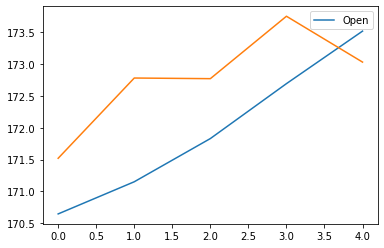

In [11]:
forecast.reset_index(drop=True).plot()
test_df['Open'].reset_index(drop=True).plot()